In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler,QuantileTransformer
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor,VotingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Analysis

A bit of analysis before we start with the machine learning part

In [2]:
data=pd.read_csv('train.csv')
data

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65


In [3]:
# Checking the data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [5]:
# cheking the numerical data

In [6]:
data.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
# look for nulls

In [8]:
data.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
# look for duplicates

In [10]:
data.duplicated().sum()

0

In [11]:
data=data.drop(['Id'],axis=1)

In [12]:
# correlation of the data

<Axes: >

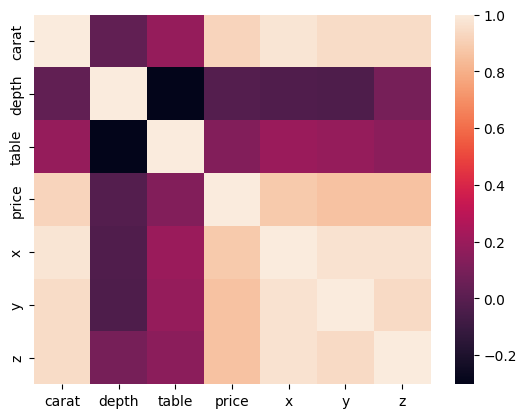

In [14]:
sns.heatmap(data.drop(['cut', 'color', 'clarity'],axis=1).corr())

In [15]:
# Seeing outliers in the data

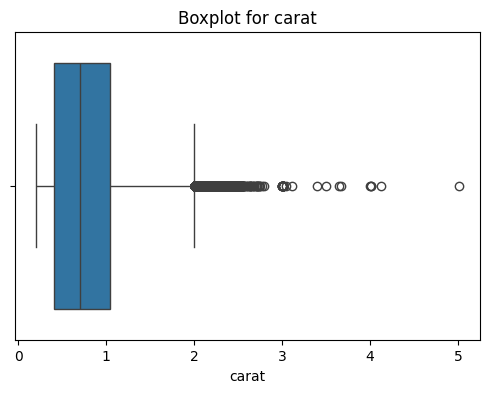

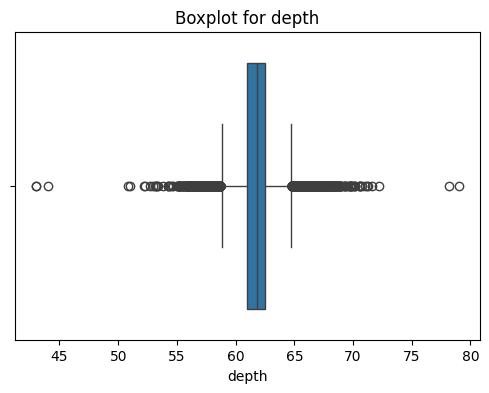

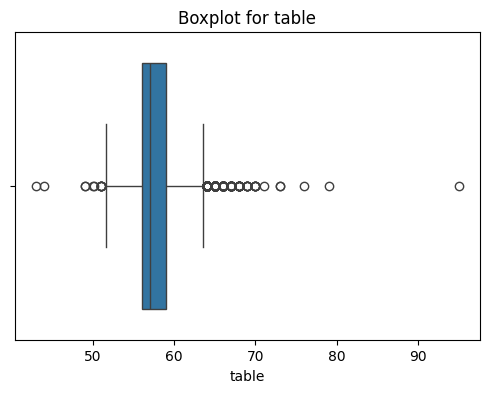

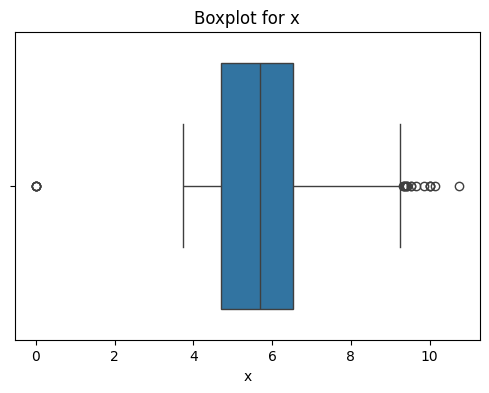

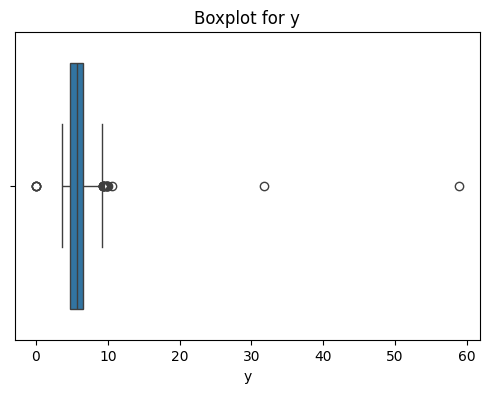

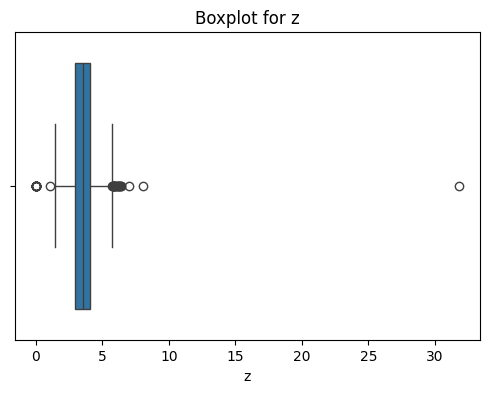

In [16]:
numeric_cols = data.select_dtypes(include=['number']).columns
for col in numeric_cols:
    if col not in 'price':
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

# Feature Engineering

We've added some new features, standarized the numerical data and label encoded the categorical data so it can be trained in the model

In [17]:
# adding new features

In [18]:
data['volume'] = data['x'] * data['y'] * data['z']

# Calculate density
data['density'] = data['carat'] / data['volume']

# Calculate surface area
data['surface_area'] = 2 * (data['x'] * data['y'] + data['x'] * data['z'] + data['y'] * data['z'])

# Calculate aspect ratio
data['aspect_ratio'] = data['x'] / data['y']

# Calculate total depth percentage
data['total_depth_percentage'] = data['depth'] / data['z']

# Calculate table percentage
data['table_percentage'] = data['table'] / data[['x', 'y']].mean(axis=1)

# Calculate symmetry
data['symmetry'] = data['x'] / data['y'] - data['y'] / data['z']

In [19]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,density,surface_area,aspect_ratio,total_depth_percentage,table_percentage,symmetry
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,176.483340,0.006006,193.9278,0.995455,15.184275,8.656036,-0.626167
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,246.965796,0.006114,243.0152,0.994609,13.503326,7.837838,-0.650624
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,52.943373,0.006044,86.9854,1.004535,22.619926,12.669683,-0.622771
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,86.422842,0.006133,120.5994,0.994253,19.184953,10.758886,-0.642111
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,115.315200,0.006070,146.2544,1.006993,17.428571,9.930314,-0.627293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43147,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18,84.997584,0.006118,119.2200,0.996139,19.339623,10.831721,-0.632792
43148,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55,115.946550,0.006210,146.4750,0.994764,17.492958,10.323710,-0.619320
43149,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02,72.801630,0.006044,107.5258,1.016427,20.364238,11.812627,-0.596156
43150,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65,51.419010,0.006029,85.4998,0.988713,22.716981,13.166856,-0.682985


In [20]:
# replacing np.inf with null

In [21]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [22]:
data.isnull().sum()

carat                      0
cut                        0
color                      0
clarity                    0
depth                      0
table                      0
price                      0
x                          0
y                          0
z                          0
volume                     0
density                   17
surface_area               0
aspect_ratio               4
total_depth_percentage    17
table_percentage           4
symmetry                  17
dtype: int64

In [23]:
for i in data:
    if data[i].isnull().sum()>0:
        data[i] = data[i].fillna(data[i].median())

In [24]:
# label encoding the categorical data

In [25]:
label_encoder = LabelEncoder()

In [26]:
data['color'] = label_encoder.fit_transform(data['color'])
data['cut'] = label_encoder.fit_transform(data['cut'])
data['clarity'] = label_encoder.fit_transform(data['clarity'])

In [26]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,density,surface_area,aspect_ratio,total_depth_percentage,table_percentage,symmetry
0,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07,176.483340,0.006006,193.9278,0.995455,15.184275,8.656036,-0.626167
1,1.51,3,3,7,60.9,58.0,15164,7.38,7.42,4.51,246.965796,0.006114,243.0152,0.994609,13.503326,7.837838,-0.650624
2,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71,52.943373,0.006044,86.9854,1.004535,22.619926,12.669683,-0.622771
3,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19,86.422842,0.006133,120.5994,0.994253,19.184953,10.758886,-0.642111
4,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50,115.315200,0.006070,146.2544,1.006993,17.428571,9.930314,-0.627293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43147,0.52,2,1,5,61.5,56.0,1760,5.16,5.18,3.18,84.997584,0.006118,119.2200,0.996139,19.339623,10.831721,-0.632792
43148,0.72,4,0,5,62.1,59.0,3016,5.70,5.73,3.55,115.946550,0.006210,146.4750,0.994764,17.492958,10.323710,-0.619320
43149,0.44,3,5,6,61.5,58.0,990,4.95,4.87,3.02,72.801630,0.006044,107.5258,1.016427,20.364238,11.812627,-0.596156
43150,0.31,3,1,4,60.2,58.0,734,4.38,4.43,2.65,51.419010,0.006029,85.4998,0.988713,22.716981,13.166856,-0.682985


In [27]:
# standarizing the data with quantile transformer

In [28]:
ss=StandardScaler()
mm=MinMaxScaler()
rs=RobustScaler()
qt=QuantileTransformer()

In [29]:
data['carat'] =qt.fit_transform(data[['carat']])
data['depth'] =qt.fit_transform(data[['depth']])
data['table'] =qt.fit_transform(data[['table']])
data['x'] =qt.fit_transform(data[['x']])
data['y'] =qt.fit_transform(data[['y']])
data['z'] =qt.fit_transform(data[['z']])
data['volume'] =qt.fit_transform(data[['volume']])
data['density'] =qt.fit_transform(data[['density']])
data['surface_area'] =qt.fit_transform(data[['surface_area']])
data['aspect_ratio'] =qt.fit_transform(data[['aspect_ratio']])
data['total_depth_percentage'] =qt.fit_transform(data[['total_depth_percentage']])
data['table_percentage'] =qt.fit_transform(data[['table_percentage']])

In [30]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,density,surface_area,aspect_ratio,total_depth_percentage,table_percentage,symmetry
0,0.759760,2,5,3,0.477477,0.457457,4270,0.758759,0.771772,0.773774,0.767986,0.134085,0.774086,0.469469,0.229708,0.225223,-0.626167
1,0.903904,3,3,7,0.217718,0.629630,15164,0.916917,0.923924,0.898899,0.912784,0.487202,0.917276,0.409619,0.078714,0.088196,-0.650624
2,0.135135,2,2,5,0.314815,0.272773,828,0.152152,0.132132,0.119620,0.142850,0.234988,0.135342,0.612362,0.856039,0.839840,-0.622771
3,0.383884,2,3,5,0.286787,0.272773,1577,0.383383,0.386887,0.374374,0.383020,0.554357,0.386386,0.392392,0.607491,0.592971,-0.642111
4,0.477978,3,4,7,0.237738,0.457457,2596,0.527027,0.496496,0.486987,0.498463,0.321908,0.506772,0.751251,0.480711,0.470062,-0.627293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43147,0.369870,2,1,5,0.372873,0.272773,1760,0.370370,0.372372,0.364865,0.369366,0.500764,0.374377,0.512013,0.625626,0.603604,-0.632792
43148,0.527528,4,0,5,0.598098,0.771772,3016,0.497998,0.501502,0.520020,0.505506,0.791900,0.509162,0.418418,0.492492,0.525526,-0.619320
43149,0.307808,3,5,6,0.372873,0.629630,990,0.320320,0.307307,0.314314,0.316736,0.233993,0.317312,0.978483,0.680681,0.709088,-0.596156
43150,0.096597,3,1,4,0.122623,0.629630,734,0.118619,0.144645,0.043544,0.107089,0.189654,0.108185,0.069069,0.869265,0.915916,-0.682985


# Building Models

There was a lot of testing in this step, here we left some of the models we have tested and ultimatly chose the best approach, whcich was to use a voting regressor.

In [85]:
# feature selection

In [86]:
x=data.drop(['price','x','y','z'],axis=1)
y=data.price

In [32]:
# here we picked a bunch of models and measured their performance, this block of code took a lot of time and wasn't that satisfactory

In [33]:
regressors = [
    LinearRegression(),
    GammaRegressor(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    PassiveAggressiveRegressor(),
    KNeighborsRegressor(),
    HistGradientBoostingRegressor(),
    LGBMRegressor(),
    ExtraTreeRegressor(),
    XGBRegressor()
]
n=5
acclist=[]
acclist1=[]
accs=dict()
accs1=dict()
for regressor in regressors:
    acclist=[]
    acclist1=[]
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        acc = r2_score(y_test, y_pred)
        acc1 = np.sqrt(mean_squared_error(y_test, y_pred))
        acclist.append(acc)
        acclist1.append(acc1)
    accs[regressor]=[np.mean(acclist),np.std(acclist)]
    accs1[regressor]=[np.mean(acclist1),np.std(acclist1)]
display(accs)
display(accs1)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3038
[LightGBM] [Info] Number of data points in the train set: 34521, number of used features: 16
[LightGBM] [Info] Start training from score 3928.099823
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001866 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3046
[LightGBM] [Info] Number of data points in the train set: 34521, number of used features: 16
[LightGBM] [Info] Start training from score 3931.377886
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3044
[LightGBM] [Info] Number of data points in the tra

{LinearRegression(): [0.7730038046111035, 0.025413520950317507],
 GammaRegressor(): [0.4214874269092205, 0.005388154616071756],
 SVR(): [0.1867219652192636, 0.004249598021523397],
 DecisionTreeRegressor(): [0.9639088884108382, 0.002104797074586332],
 RandomForestRegressor(): [0.9807286360090307, 0.0008517013302422826],
 PassiveAggressiveRegressor(): [0.6487496939013807, 0.009595236909752853],
 KNeighborsRegressor(): [0.9042092032892366, 0.002402808234107763],
 HistGradientBoostingRegressor(): [0.9815037760712387, 0.000352354434853743],
 LGBMRegressor(): [0.9809643782341982, 0.0010084657721040598],
 ExtraTreeRegressor(): [0.958974560262258, 0.0032961846765844544],
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, import

{LinearRegression(): [1900.710200856888, 119.00769245087996],
 GammaRegressor(): [3046.488262608953, 31.467883971628435],
 SVR(): [3595.8676070485285, 23.30023836933335],
 DecisionTreeRegressor(): [755.9748886213953, 23.552207046939966],
 RandomForestRegressor(): [555.2683456557854, 11.854197500598532],
 PassiveAggressiveRegressor(): [2392.770320796441, 34.04577842198726],
 KNeighborsRegressor(): [1236.4697939419984, 21.32103194608495],
 HistGradientBoostingRegressor(): [538.3983051853759, 5.0662605279895985],
 LGBMRegressor(): [545.3271483374659, 12.897290288418906],
 ExtraTreeRegressor(): [811.9778159861056, 28.130474736233964],
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              int

In [34]:
# testing the random forest regressor with the best parameters we've discoverd

In [35]:
x=data.drop(['price'],axis=1)
y=data.price
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42)
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
display(r2_score(y_pred,y_test))
display(np.sqrt(mean_squared_error(y_pred,y_test)))

0.9805702167320466

541.5579787702861

In [36]:
# after a lot of testing for lgbm, we have found out the best parameters and they were:
# Best Parameters: {'learning_rate': 0.041, 'max_depth': 7, 'n_estimators': 600}
# in the code block below we've tested the lgbm regressor performance with the best parameters

In [37]:
x=data.drop(['price','z','x','y'],axis=1)
y=data.price
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.2)
lgpm=LGBMRegressor(learning_rate=0.041,max_depth=7, n_estimators=600)
lgpm.fit(X_train1,y_train1)
y_pred4 = lgpm.predict(X_test1)
display(r2_score(y_pred4,y_test1))
display(np.sqrt(mean_squared_error(y_pred4,y_test1)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2276
[LightGBM] [Info] Number of data points in the train set: 34521, number of used features: 13
[LightGBM] [Info] Start training from score 3927.397555
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

0.9821293147948275

523.3490449378472

In [38]:
# more testing this time with the Hist Gradient Boosting Regressor

In [39]:
x3=data.drop(['price'],axis=1)
y3=data.price
X_train2, X_test2, y_train2, y_test2 = train_test_split(x3, y3, test_size = 0.2)

hg=HistGradientBoostingRegressor()
hg.fit(X_train2,y_train2)

y_pred5 = hg.predict(X_test2)
display(r2_score(y_pred5,y_test2))
display(np.sqrt(mean_squared_error(y_pred5,y_test2)))

0.9818777412262422

533.1357435867529

In [40]:
# now we get to the approach we've used, this is the voting regressor it  fits several base regressors,
# each on the whole dataset. Then it averages the individual predictions to form a final prediction.

In [41]:
# the voting regressor has gaven us the best result so far, so we picked it along side with the best models we've tested so far

In [42]:
model1 = RandomForestRegressor(n_estimators=100)
model2 = HistGradientBoostingRegressor()
model3 = LGBMRegressor()
model4 =  XGBRegressor()
voting_regressor = VotingRegressor([('rf', model1), ('gb', model2), ('lg', model3),('xg', model4)])

# Step 4: Train the ensemble model
voting_regressor.fit(X_train1, y_train1)

# Step 5: Evaluate the model performance
y_pred = voting_regressor.predict(X_test1)
mse = mean_squared_error(y_test1, y_pred)
display(r2_score(y_pred,y_test1))
print("Mean Squared Error:", np.sqrt(mse))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2276
[LightGBM] [Info] Number of data points in the train set: 34521, number of used features: 13
[LightGBM] [Info] Start training from score 3927.397555


0.9822796396976986

Mean Squared Error: 519.4638804851867


In [43]:
# This is the final model we've used, we have added an extra model to increase the voting regressor's accuracy

In [87]:
model1 = RandomForestRegressor()
model2 = HistGradientBoostingRegressor(learning_rate= 0.1,max_depth=16)
model3 = LGBMRegressor(learning_rate=0.041,max_depth=7, n_estimators=600)
model4 = XGBRegressor(learning_rate=0.1, max_depth= 7)
model5 = ExtraTreesRegressor(n_estimators=600)
voting_regressor = VotingRegressor([('rf', model1), ('gb', model2), ('lg', model3),('xg', model4),('etr',model5)])

# Step 4: Train the ensemble model
voting_regressor.fit(X_train1, y_train1)

# Step 5: Evaluate the model performance
y_pred = voting_regressor.predict(X_test1)
mse = mean_squared_error(y_test1, y_pred)
display(r2_score(y_pred,y_test1))
print("Mean Squared Error:", np.sqrt(mse))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2276
[LightGBM] [Info] Number of data points in the train set: 34521, number of used features: 13
[LightGBM] [Info] Start training from score 3927.397555
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

0.9825913537915727

Mean Squared Error: 514.991070195821


In [64]:
# the code block below were to see which were the best parameters for each model, these blocks are unnessary now, but we've kept them for refereance,
# the one below took the most amount of time in this whole project.

In [ ]:
# NEVER EVER RUN THIS UNLESS YOU ARE 100 PERCENT SURE

param_grid = {
    'n_estimators': np.arange(600, 700, 20),
    'learning_rate': np.arange(0.04, 0.045, 0.001),
    'max_depth': np.arange(5, 8, 1),
    #'num_leaves': np.arange(20, 41, 5), 
    #'min_child_samples': np.arange(10, 31, 5), 
    #'reg_alpha': [0, 0.1, 0.5, 1.0], 
    #'reg_lambda': [0, 0.1, 0.5, 1.0] 
}
lgbm = LGBMRegressor()
grid_search = GridSearchCV(lgbm, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train1, y_train1)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

In [46]:
param_grid = {
    'learning_rate': np.arange(0.1, 1, 0.1),
    'max_depth': np.arange(9, 19, 1), 
}
gb = HistGradientBoostingRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train1, y_train1)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 16}


In [47]:
param_grid = {
    'learning_rate': np.arange(0.1, 1, 0.1),
    'max_depth': np.arange(1, 10, 1), 
}
xg = XGBRegressor()
grid_search = GridSearchCV(xg, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train1, y_train1)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7}


# Testing

In [88]:
# Finally we will implement the model into a testing dataset

In [89]:
test=pd.read_csv('test.csv')
test

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92
...,...,...,...,...,...,...,...,...,...,...
10783,10784,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26
10784,10785,1.05,Ideal,G,VS2,60.8,57.0,6.65,6.58,4.02
10785,10786,0.71,Ideal,E,VVS1,62.3,55.0,5.68,5.72,3.55
10786,10787,1.11,Premium,E,SI2,61.0,60.0,6.68,6.66,4.07


In [90]:
# adding the features we've added in the training data to the testing data

In [91]:
test['volume'] = test['x'] * test['y'] * test['z']
test['density'] = test['carat'] / test['volume']
test['surface_area'] = 2 * (test['x'] * test['y'] + test['x'] * test['z'] + test['y'] * test['z'])
test['aspect_ratio'] = test['x'] / test['y']
test['total_depth_percentage'] = test['depth'] / test['z']
test['table_percentage'] = test['table'] / test[['x', 'y']].mean(axis=1)
test['symmetry'] = test['x'] / test['y'] - test['y'] / data['z']

In [92]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      10788 non-null  int64  
 1   carat                   10788 non-null  float64
 2   cut                     10788 non-null  object 
 3   color                   10788 non-null  object 
 4   clarity                 10788 non-null  object 
 5   depth                   10788 non-null  float64
 6   table                   10788 non-null  float64
 7   x                       10788 non-null  float64
 8   y                       10788 non-null  float64
 9   z                       10788 non-null  float64
 10  volume                  10788 non-null  float64
 11  density                 10788 non-null  float64
 12  surface_area            10788 non-null  float64
 13  aspect_ratio            10785 non-null  float64
 14  total_depth_percentage  10788 non-null

In [93]:
# replacing nulls

In [94]:
test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [95]:
for i in test:
    if test[i].isnull().sum()>0:
        test[i] = test[i].fillna(data[i].median())

In [96]:
test.isnull().sum()

Id                        0
carat                     0
cut                       0
color                     0
clarity                   0
depth                     0
table                     0
x                         0
y                         0
z                         0
volume                    0
density                   0
surface_area              0
aspect_ratio              0
total_depth_percentage    0
table_percentage          0
symmetry                  0
dtype: int64

In [97]:
test

,Id,carat,cut,color,clarity,depth,table,x,y,z,volume,density,surface_area,aspect_ratio,total_depth_percentage,table_percentage,symmetry
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75,55.686400,0.006106,89.9992,1.008929,22.218182,12.666667,-4.780877
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58,116.719456,0.006083,146.9736,1.010563,17.513966,10.157618,-5.308278
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05,71.889720,0.006120,106.3718,0.989754,20.590164,11.534501,-39.806229
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65,134.037855,0.006043,161.9214,1.009950,16.465753,9.735974,-15.096921
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92,66.435840,0.006021,101.2176,0.987500,20.958904,11.740042,-8.869026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,10784,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26,93.309024,0.006109,127.0088,0.996269,18.680982,10.467290,-7.891101
10784,10785,1.05,Ideal,G,VS2,60.8,57.0,6.65,6.58,4.02,175.903140,0.005969,193.8832,1.010638,15.124378,8.616780,-7.938878
10785,10786,0.71,Ideal,E,VVS1,62.3,55.0,5.68,5.72,3.55,115.338080,0.006156,145.9192,0.993007,17.549296,9.649123,-41.810589
10786,10787,1.11,Premium,E,SI2,61.0,60.0,6.68,6.66,4.07,181.069416,0.006130,197.5652,1.003003,14.987715,8.995502,-8.167693


In [98]:
# preprocessing

In [99]:
test['color'] = label_encoder.fit_transform(test['color'])
test['cut'] = label_encoder.fit_transform(test['cut'])
test['clarity'] = label_encoder.fit_transform(test['clarity'])
test['carat'] =qt.fit_transform(test[['carat']])
test['depth'] =qt.fit_transform(test[['depth']])
test['table'] =qt.fit_transform(test[['table']])
test['x'] =qt.fit_transform(test[['x']])
test['y'] =qt.fit_transform(test[['y']])
test['z'] =qt.fit_transform(test[['z']])
test['volume'] =qt.fit_transform(test[['volume']])
test['density'] =qt.fit_transform(test[['density']])
test['surface_area'] =qt.fit_transform(test[['surface_area']])
test['aspect_ratio'] =qt.fit_transform(test[['aspect_ratio']])
test['table_percentage'] =qt.fit_transform(test[['table_percentage']])
test['total_depth_percentage'] =qt.fit_transform(test[['total_depth_percentage']])
test['symmetry'] =qt.fit_transform(test[['symmetry']])

In [100]:
test.isnull().sum()

Id                        0
carat                     0
cut                       0
color                     0
clarity                   0
depth                     0
table                     0
x                         0
y                         0
z                         0
volume                    0
density                   0
surface_area              0
aspect_ratio              0
total_depth_percentage    0
table_percentage          0
symmetry                  0
dtype: int64

In [101]:
# using the model on the testing data

In [102]:
# model1 = RandomForestRegressor(n_estimators=600)
# model2 = HistGradientBoostingRegressor(learning_rate=0.1,max_depth=13)
# model3 = LGBMRegressor(learning_rate=0.041,max_depth=7, n_estimators=600)
# model4 = XGBRegressor()
# model6 = ExtraTreesRegressor(n_estimators=600)
# voting_regressor = VotingRegressor([('rf', model1), ('gb', model2), ('lg', model3),('xg', model4),('etr',model6)])

# Step 4: Train the ensemble model
#voting_regressor.fit(x,y)
test['price']=voting_regressor.predict(test.drop(['Id','x','y','z'],axis=1))
test.rename(columns={'Id': 'id'}, inplace=True)
test50=test[['id','price']]
test50

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,id,price
0,1,942.558450
1,2,2871.505050
2,3,902.885499
3,4,2995.521700
4,5,1100.144552
...,...,...
10783,10784,1758.649892
10784,10785,6446.196224
10785,10786,4403.798276
10786,10787,4712.952553


In [105]:
import pickle

pickle.dump(voting_regressor, open('model.pkl','wb'))

In [107]:
test50.to_csv('submission.csv',index=False)